In [2]:
import numpy as np
import matplotlib.pyplot as plt

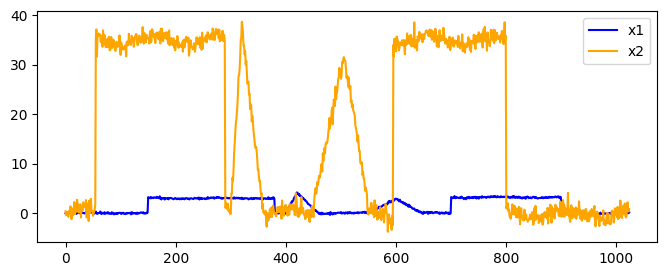

In [4]:
# Define the time series
t = np.arange(1024)
y1 = np.sin(t / 20) + np.random.normal(0, 1, 1024)
y2 = np.sin(t / 20) + np.random.normal(0, 1, 1024)

y1[150:380] += 30.0
y2[55:290] += 35.0

y1[400:420] += 40 * np.arange(20) / 20
y1[420:460] += 40 * (1 - np.arange(40) / 40)
y2[300:320] += 38 * np.arange(20) / 20
y2[320:360] += 38 * (1 - np.arange(40) / 40)

y1[550:600] += 30 * np.arange(50) / 50
y1[600:645] += 30 * (1 - np.arange(45) / 45)
y2[445:505] += 32 * np.arange(60) / 60
y2[505:550] += 32 * (1 - np.arange(45) / 45)

y1[700:900] += 32.0
y2[595:800] += 35.0

y1 /= 10.0

plt.figure(figsize=(8, 3))
plt.plot(y1, color='blue', label="x1")
plt.plot(y2, color='orange', label="x2")
plt.legend()

Text(0.5, 1.0, 'SBD = 1 - max(NCC(x1, x2)) = 0.025')

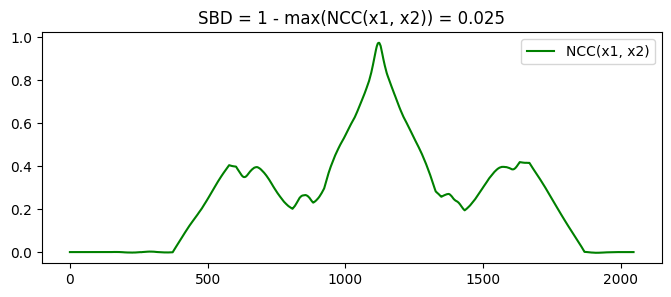

In [ ]:
def ncc(y1, y2):
    def cross_correlation(x, y):
        return np.correlate(x, y, mode='full')

    def auto_correlation(x):
        return np.correlate(x, x, mode='full')

    # Calculate cross correlation
    cc = cross_correlation(y1, y2)

    # Normalize
    ccT_1 = auto_correlation(y1)
    ccT_2 = auto_correlation(y2)
    ncc_c = cc / np.sqrt(ccT_1[len(ccT_1)//2] * ccT_2[len(ccT_2)//2])
    return ncc_c

# Plot the NCC
plt.figure(figsize=(8, 3))
plt.plot(ncc(y1, y2), color='green', label="NCC(x1, x2)")
plt.legend()
plt.ylim((-1, 1))
plt.title(f"SBD = 1 - max(NCC(x1, x2)) = {1 - max(ncc(y1, y2)):.3f}")

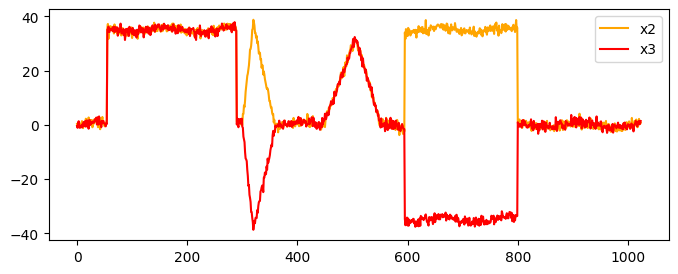

In [9]:
# Set y3 and recalculate sbd
y3 = np.sin(t / 20) + np.random.normal(0, 1, 1024)
y3[55:290] += 35.0

y3[300:320] -= 38 * np.arange(20) / 20
y3[320:360] -= 38 * (1 - np.arange(40) / 40)

y3[445:505] += 32 * np.arange(60) / 60
y3[505:550] += 32 * (1 - np.arange(45) / 45)

y3[595:800] -= 35.0
plt.figure(figsize=(8, 3))
plt.plot(y2, color='orange', label="x2")
plt.plot(y3, color='red', label="x3")
plt.legend()

Text(0.5, 1.0, 'SBD = 1 - max(NCC(x2, x3)) = 0.583')

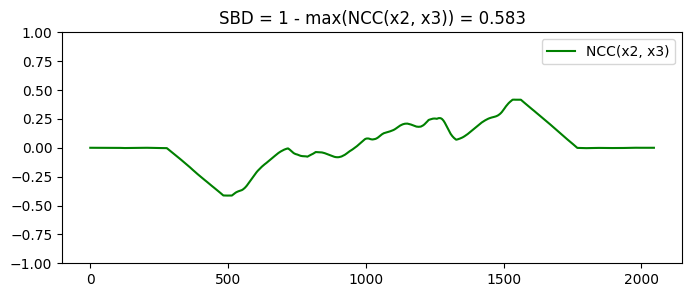

In [11]:
# Plot the NCC
plt.figure(figsize=(8, 3))
plt.plot(ncc(y2, y3), color='green', label='NCC(x2, x3)')
plt.legend()
plt.ylim((-1, 1))
plt.title(f"SBD = 1 - max(NCC(x2, x3)) = {1 - max(ncc(y2, y3)):.3f}")